# 순환 신경망

## Embedding 
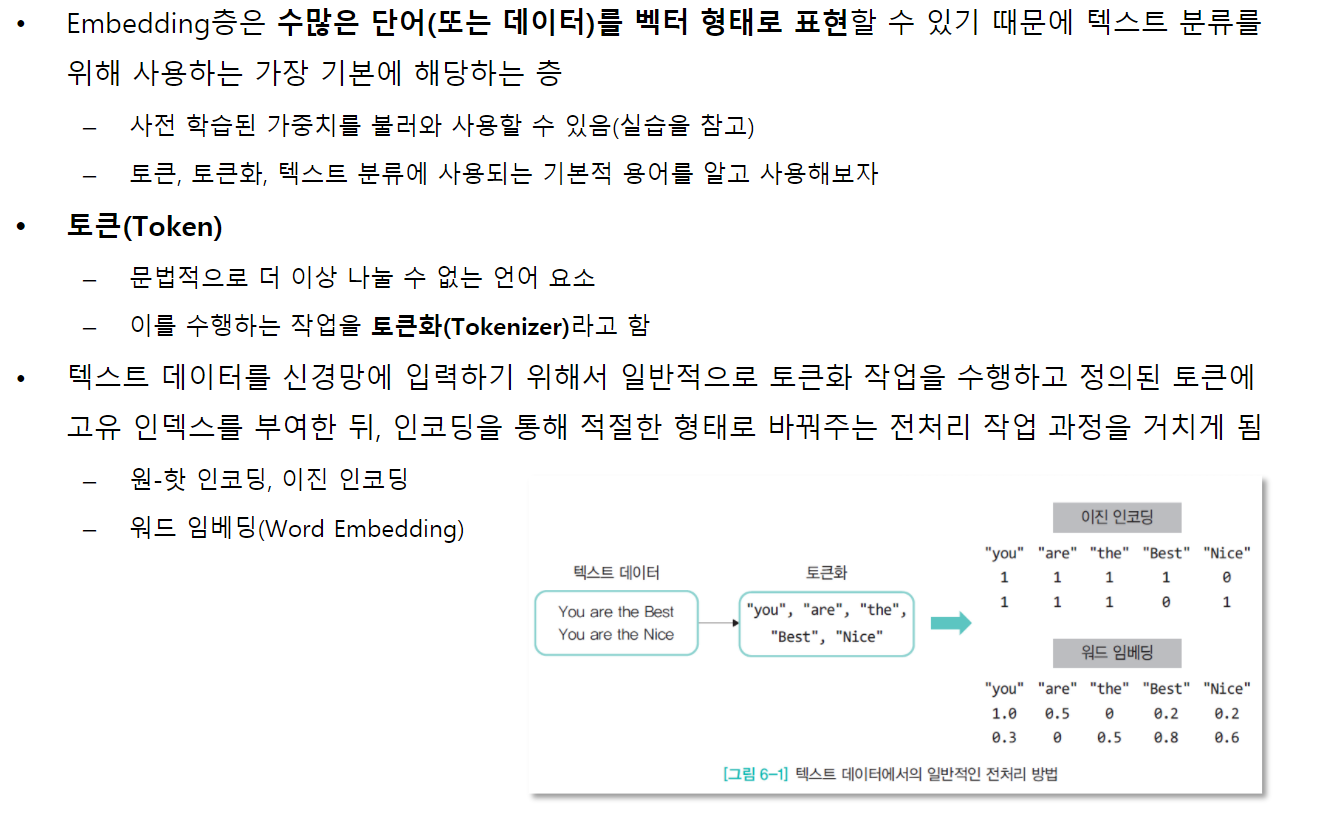     


### 토큰화 작업 수행하기
- tensorflow.keras.preprocessing.text 모듈에서 이를 위한 함수를 제공

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

### 데이터 준비

In [ ]:
texts = ['You are the Best', 
         'You are the Nice']

### Tokenizer() 함수를 사용하여 토큰화 작업 수행
- oov_token: 데이터에 나타나지 않은 단어를 전달된 단어로 교체
- fit_on_texts() 함수를 통해 데이터에 적용하고, texts_to_sequences() 함수로 변환


In [ ]:
tokenizer = Tokenizer(num_words = 10, oov_token = '<OOV>')
tokenizer.fit_on_texts(texts)

word_index = tokenizer.word_index
print(word_index)
print('-'*70)

# 텍스트 데이터를 정수 인덱스 형태로 변환합니다.
sequences = tokenizer.texts_to_sequences(texts)
print(f'sequences: {sequences}\n')

{'<OOV>': 1, 'you': 2, 'are': 3, 'the': 4, 'best': 5, 'nice': 6}
----------------------------------------------------------------------
sequences: [[2, 3, 4, 5], [2, 3, 4, 6]]



- sequences_to_matrix() 함수를 사용하면 이진 형태로 인코딩된 결과를 얻을 수 있음    

In [ ]:
# 이진 형태로 인코딩합니다.
binary_results = tokenizer.sequences_to_matrix(sequences, mode = 'binary')
print(f'binary_vectors:\n {binary_results}\n')

binary_vectors:
 [[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0. 0.]]



 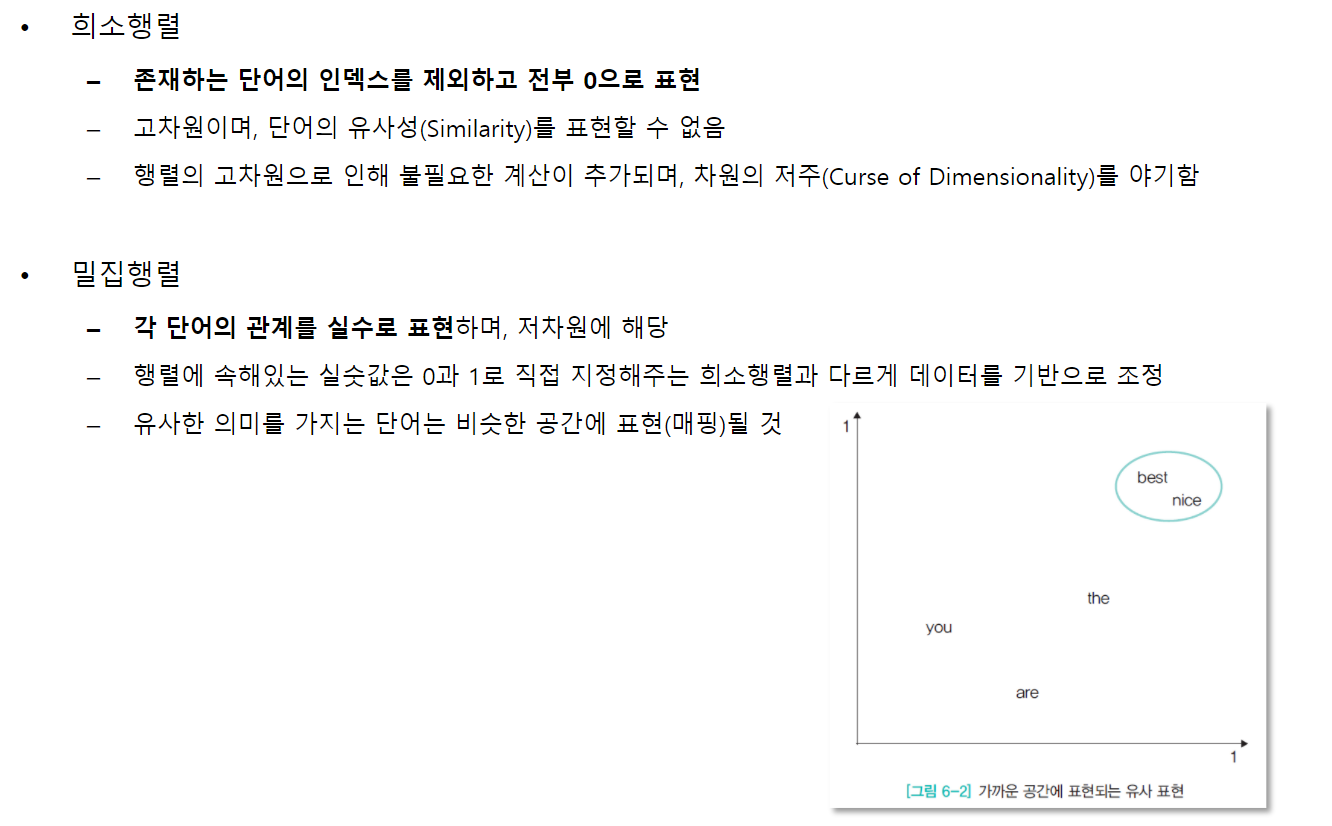  

- sequences_to_matrix() 또는 to_categorical() 함수에서 얻을 수 있는 결과를 희소 행렬(Sparse Matrix)라고 표현하며, 이와 반대되는 개념을 밀집 행렬(Dense Matrix)라고 표현함   
※ 참고자료: https://wikidocs.net/33520

In [ ]:
# 원-핫 형태로 인코딩합니다.
# 희소행렬
print(to_categorical(sequences))

[[[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]]

 [[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


- 새로운 데이터 “You are the One”
  - ‘One’ 단어는 새로 등장했기 때문에, ‘OOV’로 대체됨


In [ ]:
test_text = ['You are the One']
test_seq = tokenizer.texts_to_sequences(test_text)

print(f'test sequences: {test_seq}')

test sequences: [[2, 3, 4, 1]]


### Embedding층을 활용하여 IMDB 데이터셋 문제를 해결
- 위에서 배운 전처리 과정이 전부 수행된 채로 제공됨


#### 데이터셋 다운받기
- num_words 인자를 통해 사용할 단어의 개수를 조절(여기서는 10,000개만 사용)
- 학습 데이터와 테스트 데이터는 5:5 비율로 나뉘어서 제공


In [1]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

17473536/17464789 [==============================] - 0s 0us/step


#### 데이터 형태 확인하기
- 데이터에서 확인할 수 있는 숫자는 빈번하게 사용되는 정도를 나타냄
- 레이블 🡪 1(긍정), 0(부정)


In [2]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [ ]:
# 첫 번째 데이터 확인하기
print(X_train[0])
print('-'*300)
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
------------------------------------------------------------

#### IMDB 데이터셋에서 가장 빈번하게 사용되는 3개의 단어
- 가장 빈번하게 사용되는 세 가지 단어 출력해보기
the, and, a
- 포함? 제외? 고민해볼 수 있음
- 포함시킨다면 어떤 방법으로 포함시킬 것인가 등


In [ ]:
imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
imdb_get_word_index = {}

for key, value in imdb.get_word_index().items():
    imdb_get_word_index[value] = key
    
for i in range(1, 4):
    print('{} 번째로 가장 많이 쓰인 단어 = {}'.format(i, imdb_get_word_index[i]))

1 번째로 가장 많이 쓰인 단어 = the
2 번째로 가장 많이 쓰인 단어 = and
3 번째로 가장 많이 쓰인 단어 = a


#### 데이터를 동일한 길이로 맞추기
- 데이터의 길이가 전부 동일하도록 조정해주기 위해 pad_sequences() 함수를 사용
  - 지정해준 길이보다 짧은 경우 0으로 채워넣음(zero padding), 긴 경우는 잘라냄


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

print('Before pad_sequences: ', len(X_train[0]))

pad_X_train = pad_sequences(X_train, maxlen=max_len, padding = 'pre')
pad_X_test = pad_sequences(X_test, maxlen=max_len, padding = 'pre')

print('After pad_sequences: ', len(pad_X_train[0]))

Before pad_sequences:  218
After pad_sequences:  500


In [ ]:
pad_X_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

#### Embedding 층을 사용하여 모델 구성하기
- Embedding층은 모델의 첫 번째 층으로만 사용할 수 있으며, 주로 순환 신경망과 연결하여 사용
  - (batch_size, sequence_length) 형태를 입력으로 받으며, (batch_size, sequence_length, output_dim) 형태를 출력
  - input_dim(학습 데이터에서 사용한 단어의 개수), output_dim(임베딩 벡터 크기)
  - input_length 인자는 순환 신경망과 연결할 경우엔 사용하지 않음


※ 참고: https://tykimos.github.io/2017/08/17/Text_Input_Binary_Classification_Model_Recipe/    
- 첫번째 인자(input_dim) : 단어 사전의 크기를 말하며 총 num_words(10000)개의 단어 종류가 있다는 의미입니다. 이 값은 앞서 imdb.load_data() 함수의 num_words 인자값과 동일해야 합니다.   
- 두번째 인자(output_dim) : 단어를 인코딩 한 후 나오는 벡터 크기 입니다. 이 값이 128이라면 단어를 128차원의 의미론적 기하공간에 나타낸다는 의미입니다. 단순하게 빈도수만으로 단어를 표시한다면, 10과 11은 빈도수는 비슷하지만 단어로 볼 때는 전혀 다른 의미를 가지고 있습니다. 하지만 의미론적 기하공간에서는 거리가 가까운 두 단어는 의미도 유사합니다. 즉 임베딩 레이어는 입력되는 단어를 의미론적으로 잘 설계된 공간에 위치시켜 벡터로 수치화 시킨다고 볼 수 있습니다.   
- input_length : 단어의 수 즉 문장의 길이를 나타냅니다. 임베딩 레이어의 출력 크기는 샘플 수    
* output_dim * input_lenth가 됩니다. 임베딩 레이어 다음에 Flatten 레이어가 온다면 반드시 input_length를 지정해야 합니다. 플래튼 레이어인 경우 입력 크기가 알아야 이를 1차원으로 만들어서 Dense 레이어에 전달할 수 있기 때문입니다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()

# 이 층은 모델의 제일 첫 번째 층으로만 사용할 수 있습니다.
# Flatten 층을 사용하기 위해 input_length를 전달합니다.
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 16001     
Total params: 336,001
Trainable params: 336,001
Non-trainable params: 0
_________________________________________________________________


#### 모델 학습 및 평가하기
- validation_split 인자 사용
  - 학습 데이터의 끝에서 해당 비율만큼 떼어내어 검증 데이터셋으로 활용
  - 무작위로 20% 비율만큼 뽑아오는 것이 아닌 단순하게 끝에서 떼어낸다는 점을 주의

In [ ]:
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, 
                    epochs = 30, 
                    validation_split = 0.2)

Epoch 1/30
625/625 [==============================] - 4s 3ms/step - loss: 0.4717 - acc: 0.7595 - val_loss: 0.2930 - val_acc: 0.8782
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: 0.2038 - acc: 0.9252 - val_loss: 0.2815 - val_acc: 0.8850
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: 0.1049 - acc: 0.9707 - val_loss: 0.2821 - val_acc: 0.8884
Epoch 4/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0483 - acc: 0.9919 - val_loss: 0.3078 - val_acc: 0.8862
Epoch 5/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0218 - acc: 0.9982 - val_loss: 0.3325 - val_acc: 0.8854
Epoch 6/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0108 - acc: 0.9997 - val_loss: 0.3594 - val_acc: 0.8812
Epoch 7/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0058 - acc: 0.9999 - val_loss: 0.3811 - val_acc: 0.8836
Epoch 8/30
625/625 [==============================] - 2s 3ms/step - loss: 0.

In [ ]:
model.evaluate(pad_X_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.8592 - acc: 0.8680


[0.8591844439506531, 0.8679999709129333]

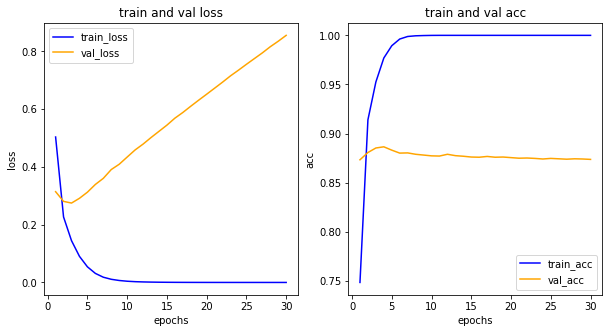

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()